### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

### Set-up

In [58]:
# we will read the dataset that we created in the previous exercise
df = pd.read_csv("winequality.csv", encoding='ISO-8859-1')
df = df.drop(df.columns[0],axis=1)


sns.set(style='darkgrid')

In [59]:
df['quality']=pd.to_numeric(df['quality'])

df['test']=0

In [60]:

mask = (df['quality']>7)

df['test'][mask] = 1

/Users/liz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [63]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type,test
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White,0


In [64]:
target = 'test'

In [65]:
df = df.drop('quality', axis=1)

### Read data

In [31]:
df.to_csv(r'wine_target.csv')

In [66]:
df = pd.get_dummies(df, columns=['wine type'])


In [71]:
df = df.drop('wine type_Red', axis=1)

### Set-up X and y

In [73]:
y = df[target]
X = df.drop(target, axis=1)



### Split the data


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=314)

len(X_train), len(X_test)

(3248, 3249)

**EXERCISE:**
    
Perform a random-search to optimize the following hyperparameters for a *Gradient Boosting* model.

Number of trees: `n_estimators = [100, 300, 500]`

Learning rate: `learning_rate = [0.05, 0.1, .5]`

Maximum number of levels in tree: `max_depth = [3, 6]`

Minimum percentage of samples required in the leaf nodes: `min_samples_leaf = [0.01, 0.02, 0.05]`


In [94]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(random_state=314)

param_grid = {'n_estimators': [100, 300, 500], 
              'learning_rate': [0.05, 0.1, 0.5],
              'max_depth': [3, 6],
              'min_samples_leaf': [0.01, 0.02, 0.05]}
gbm_rs = RandomizedSearchCV(gbm, param_grid, cv=3, n_iter=10, n_jobs=-1, random_state=314)

gbm_rs.fit(X_train, y_train)
print ('Best GBM Parameters:', gbm_rs.best_params_)

gbm_scores_train = gbm_rs.predict_proba(X_train)[:, 1]
gbm_scores_test = gbm_rs.predict_proba(X_test)[:, 1]

gbm_fpr_train, gbm_tpr_train, _ = roc_curve(y_train, gbm_scores_train)
gbm_fpr_test, gbm_tpr_test, _ = roc_curve(y_test, gbm_scores_test)

Best GBM Parameters: {'n_estimators': 500, 'min_samples_leaf': 0.05, 'max_depth': 6, 'learning_rate': 0.05}


In [96]:

gbm = GradientBoostingClassifier(random_state=314,n_estimators=500,min_samples_leaf=.05,max_depth=6,learning_rate=.05)


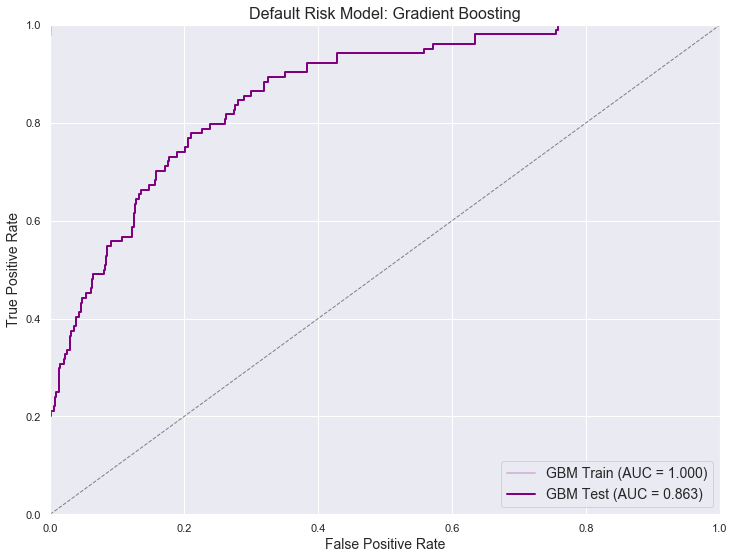

In [97]:
# ROC Curve
plt.figure().set_size_inches(12, 9)

plt.plot(gbm_fpr_train, gbm_tpr_train, color='purple', lw=2, alpha = 0.2, linestyle = '-',
         label=f'GBM Train (AUC = {roc_auc_score(y_train, gbm_scores_train):0.3f})')

plt.plot(gbm_fpr_test, gbm_tpr_test, color='purple', lw=2, linestyle = '-',
         label=f'GBM Test (AUC = {roc_auc_score(y_test, gbm_scores_test):0.3f})')


plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
plt.title('Default Risk Model: Gradient Boosting', fontsize = 16)
plt.legend(loc='lower right', fontsize = 14)
plt.show();

In [98]:
gbm_scores_train = gbm_rs.predict_proba(X_train)[:, 1]

roc_auc_score(y_train, gbm_scores_train)



0.9999831352284839

In [99]:
gbm_scores_test = gbm_rs.predict_proba(X_test)[:, 1]


roc_auc_score(y_test, gbm_scores_test)

0.8625993640699522

Let's see what would have happened if we ran a full grid search.

The best hyper-parameters are different than what the random search had identified.